## Text Analysis

## 01. Import Libraries

In [41]:
# import libraries

from textblob import TextBlob 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import nltk
import re
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
from collections import Counter
sns.set()

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/piperdutcher/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/piperdutcher/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/piperdutcher/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [45]:
# import specific tools within the NLTK library:

from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords

## 02. Import Data

In [54]:
# import .txt of entire 20th century article:
# reference URL: ("https://en.wikipedia.org/wiki/Key_events_of_the_20th_century")


with open('20th-Century.txt', 'r', errors='ignore') as file:
    article = file.read().replace('\n', '')

In [57]:
# import list of countries:
# reference URL: ("https://simple.m.wikipedia.org/wiki/List_of_countries")

countries = pd.read_csv("countries_list.csv", index_col = 0)

## 03. Begin Analysis 

In [69]:
# tokenize 20th century .txt file
# start with the sent_tokenize from the NLTK library to tokenize sentences.

tokenized_article = sent_tokenize(article)

# print to see efficacy

print(tokenized_article)

['Key events of the 20th century - WikipediaJump to contentMain menuMain menumove to sidebarhide\t\tNavigation\tMain pageContentsCurrent eventsRandom articleAbout WikipediaContact usDonate\t\tContribute\tHelpLearn to editCommunity portalRecent changesUpload fileSearchSearchAppearanceCreate accountLog inPersonal tools Create account Log in\t\tPages for logged out editors learn moreContributionsTalkContentsmove to sidebarhide(Top)1Historic events in the 20th centuryToggle Historic events in the 20th century subsection1.1The world at the beginning of the century1.1.1"The war to end all wars": World War I (1914–1918)1.1.2The Russian Revolution and Communism1.2Between the wars1.2.1Economic depression1.2.2The rise of dictatorship1.3Global war: World War II (1939–1945)1.3.1The war in Europe1.3.2Blitzkrieg1.3.3Operation Barbarossa1.3.4Turning tides1.3.5Operation Overlord1.3.6Final days1.3.7The war in the Pacific1.3.7.1Background1.3.8Japanese Expansion1.3.9Allied offensive1.3.10Final days1.3.11

In [75]:
# in order to find the top ten most commonly used words, will need to tokenize each word
# do this using word_tokenize from NLTK library:

tokenized_words = word_tokenize(article)

# print to see efficacy:

print(tokenized_words)

['Key', 'events', 'of', 'the', '20th', 'century', '-', 'WikipediaJump', 'to', 'contentMain', 'menuMain', 'menumove', 'to', 'sidebarhide', 'Navigation', 'Main', 'pageContentsCurrent', 'eventsRandom', 'articleAbout', 'WikipediaContact', 'usDonate', 'Contribute', 'HelpLearn', 'to', 'editCommunity', 'portalRecent', 'changesUpload', 'fileSearchSearchAppearanceCreate', 'accountLog', 'inPersonal', 'tools', 'Create', 'account', 'Log', 'in', 'Pages', 'for', 'logged', 'out', 'editors', 'learn', 'moreContributionsTalkContentsmove', 'to', 'sidebarhide', '(', 'Top', ')', '1Historic', 'events', 'in', 'the', '20th', 'centuryToggle', 'Historic', 'events', 'in', 'the', '20th', 'century', 'subsection1.1The', 'world', 'at', 'the', 'beginning', 'of', 'the', 'century1.1.1', "''", 'The', 'war', 'to', 'end', 'all', 'wars', "''", ':', 'World', 'War', 'I', '(', '1914–1918', ')', '1.1.2The', 'Russian', 'Revolution', 'and', 'Communism1.2Between', 'the', 'wars1.2.1Economic', 'depression1.2.2The', 'rise', 'of', 'd

In [84]:
# create a bar chart to plot the top 10 words

# first step is to create a frequency distribution to find the count of each word
# do this using freqDist from NLTK library:

freq_words = FreqDist(tokenized_words)
print (freq_words)

<FreqDist with 4882 samples and 20333 outcomes>


In [102]:
# now that we have the frequency, we can use most_common() to find the top ten:

top_ten_words = freq_words.most_common(10)
print(top_ten_words)

[('.', 1277), ('the', 1095), (',', 989), ('of', 604), ('and', 397), ('to', 326), ('The', 302), ('[', 302), (']', 302), ('in', 290)]


In [121]:
freq_words.most_common(10)

# need to create a dataframe with two columns in order to plot this with Seaborn

df_freq_words = pd.DataFrame(top_ten_words)
df_freq_words.columns = ['Word', "Frequency"]

print(df_freq_words)

  Word  Frequency
0    .       1277
1  the       1095
2    ,        989
3   of        604
4  and        397
5   to        326
6  The        302
7    [        302
8    ]        302
9   in        290


/var/folders/02/_ydtglj578xfqwjs1hm49rhc0000gn/T/ipykernel_89357/1115361824.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = df_freq_words['Word'] , y = df_freq_words['Frequency'], palette = "rocket") # rocket is my favorite color palette :)


Text(0, 0.5, 'Frequencies')

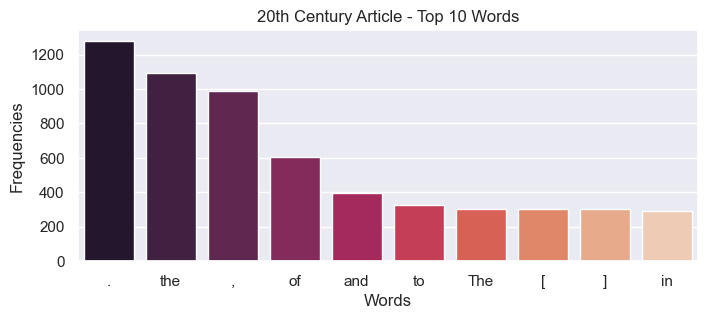

In [440]:
# lots of these appear to be punctuation or stop words (words with no "meaning"/value)
# we're going to create a plot anyways:

plt.figure(figsize=(8, 3))
sns.barplot(x = df_freq_words['Word'] , y = df_freq_words['Frequency'], palette = "rocket") # rocket is my favorite color palette :) 
plt.title('20th Century Article - Top 10 Words')
plt.xlabel('Words')
plt.ylabel('Frequencies')

In [199]:
# remove stop words then replot
# going to consider punctuation as a stop word
# using stopwords from NLTK library

stop_words = set(stopwords.words("english"))

# create a new version of the text without stopwords:
# start with an empty list, then iterate over each item in the list
# only append (add) the word to the new list IF not in stop words 
# (then repeat process for punctuation)

filtered_article = []
for word in tokenized_words:
    if word not in stop_words:
        filtered_article.append(word)

In [201]:
# now to remove punctuation
# first, replace all punctuation marks with a space
# "[a-zA-Z]" indicates all non-letters

filtered_article2 = re.sub("[^a-zA-Z]", " ", str(filtered_article))

# re-tokenize:

filtered2_tokenized = word_tokenize(filtered_article2)
print(filtered2_tokenized)

['Key', 'events', 'th', 'century', 'WikipediaJump', 'contentMain', 'menuMain', 'menumove', 'sidebarhide', 'Navigation', 'Main', 'pageContentsCurrent', 'eventsRandom', 'articleAbout', 'WikipediaContact', 'usDonate', 'Contribute', 'HelpLearn', 'editCommunity', 'portalRecent', 'changesUpload', 'fileSearchSearchAppearanceCreate', 'accountLog', 'inPersonal', 'tools', 'Create', 'account', 'Log', 'Pages', 'logged', 'editors', 'learn', 'moreContributionsTalkContentsmove', 'sidebarhide', 'Top', 'Historic', 'events', 'th', 'centuryToggle', 'Historic', 'events', 'th', 'century', 'subsection', 'The', 'world', 'beginning', 'century', 'The', 'war', 'end', 'wars', 'World', 'War', 'I', 'The', 'Russian', 'Revolution', 'Communism', 'Between', 'wars', 'Economic', 'depression', 'The', 'rise', 'dictatorship', 'Global', 'war', 'World', 'War', 'II', 'The', 'war', 'Europe', 'Blitzkrieg', 'Operation', 'Barbarossa', 'Turning', 'tides', 'Operation', 'Overlord', 'Final', 'days', 'The', 'war', 'Pacific', 'Backgrou

In [203]:
# now lets re-run the frequency distribution of the words on this new filtered article:

freq_words_filtered = FreqDist(filtered2_tokenized)
print(freq_words_filtered)

<FreqDist with 4078 samples and 10715 outcomes>


In [220]:
# find the top ten words of the newly filtered article

freqwords_filtered2 = freq_words_filtered.most_common(10)

In [222]:
# this output looks much more desirable, create a new df, then plot:

# need to create a dataframe with two columns in order to plot this with Seaborn

df_freq_words2 = pd.DataFrame(freqwords_filtered2)
df_freq_words2.columns = ['Word', "Frequency"]

print(df_freq_words2)

        Word  Frequency
0        The        324
1  Retrieved        205
2        War        129
3          s         96
4        war         91
5         th         86
6      World         76
7     Soviet         61
8     Hitler         50
9    Germany         43


/var/folders/02/_ydtglj578xfqwjs1hm49rhc0000gn/T/ipykernel_89357/1669925207.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = df_freq_words2['Word'] , y = df_freq_words2['Frequency'], palette = "rocket")


Text(0, 0.5, 'Frequencies')

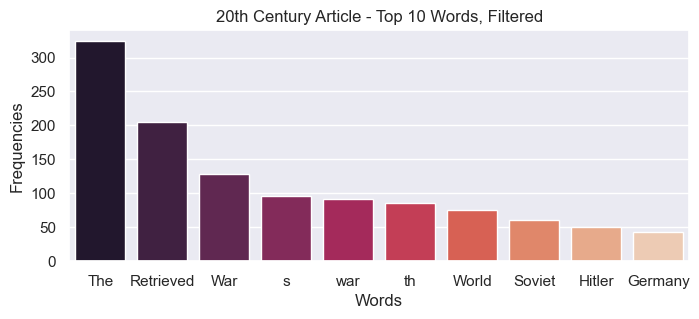

In [224]:
# using seaborn again to plot:

plt.figure(figsize=(8, 3))
sns.barplot(x = df_freq_words2['Word'] , y = df_freq_words2['Frequency'], palette = "rocket")
plt.title('20th Century Article - Top 10 Words, Filtered')
plt.xlabel('Words')
plt.ylabel('Frequencies')

The difference in the "quality" of the words in the two bar plots is fascinating. While the first plot doesn't give us much information in regard to any actual 20th Century events, we can see in the second bar plot that War, Soviet, Germany, Hitler are all very common. If we were to filter this further to remove The, th, and s, I'm sure we could gather more information.

## 04. Part of Speech Tagging (Using TextBlob):

In [315]:
# want to define some new stopwords based on the output of the last plot:

new_stopwords = ["The", "s", 'n', 't', 's', 'th','a', 'v','b','www']

# create a new list of filtered words, without the stop words:

filtered_3 = []
for word in filtered2_tokenized:
    if word not in new_stopwords:
        filtered_3.append(word)

# print(filtered_3)

In [317]:
# create a tags list using textBlob:

filtered_tb = TextBlob(str(filtered_3))

In [319]:
tag_list = filtered_tb.tags

In [320]:
# now that we have created the tag list, we want to create a new dataframe for this
# we will group by part-of-speech types later!

df_tagged_text = pd.DataFrame(tag_list)
df_tagged_text.columns = ['Word', "Word type"]

print(df_tagged_text)

                   Word Word type
0                     [        JJ
1                  'Key       NNP
2                     '       POS
3               'events       NNS
4                     '       POS
...                 ...       ...
15309                 '       POS
15310  'statementMobile        IN
15311             'view       NNP
15312                 '       POS
15313                 ]        NN

[15314 rows x 2 columns]


In [323]:
# now to group this dataframe:

text_grouped = df_tagged_text.groupby('Word type').count().reset_index()
text_grouped

,Word type,Word
0,CC,1
1,CD,75
2,DT,13
3,EX,12
4,FW,43
5,IN,157
6,JJ,284
7,JJR,13
8,JJS,60
9,MD,59


In [325]:
# create a list of top 10 POS tags for words that appear in the article

top_POS = text_grouped.sort_values(by = 'Word', ascending = False).head(10)
top_POS

,Word type,Word
13,POS,6511
11,NNP,5228
12,NNS,1029
16,VBD,848
10,NN,373
17,VBG,320
6,JJ,284
5,IN,157
15,RB,140
20,VBZ,79


In [327]:
# now to create a new list with the top ten:

top_ten_POS_list = top_POS['Word type'].tolist()

print(top_ten_POS_list)

['POS', 'NNP', 'NNS', 'VBD', 'NN', 'VBG', 'JJ', 'IN', 'RB', 'VBZ']


/var/folders/02/_ydtglj578xfqwjs1hm49rhc0000gn/T/ipykernel_89357/2759454801.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = top_POS['Word type'] , y = top_POS['Word'], palette = "rocket")


Text(0, 0.5, 'Frequency')

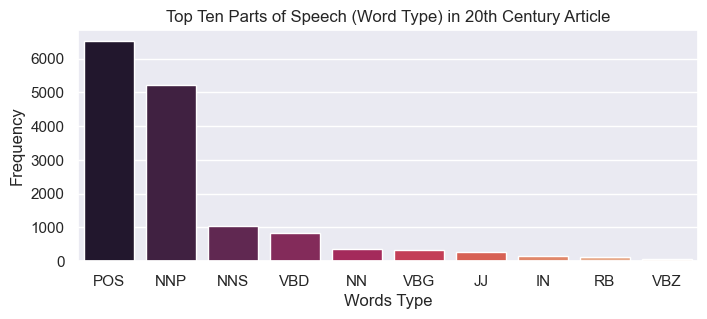

In [329]:
# plot the top 10 POS tags in a bar chart (using seaborn)

plt.figure(figsize=(8, 3))
sns.barplot(x = top_POS['Word type'] , y = top_POS['Word'], palette = "rocket")
plt.title('Top Ten Parts of Speech (Word Type) in 20th Century Article')
plt.xlabel('Words Type')
plt.ylabel('Frequency')

In [337]:
# create a bar chart with the top 15 POS labels (nouns):
# first will need to create a dataframe with just Nouns (NN, NNS, NNP)
# using our above dataframe df_tagged_text

df_nouns = df_tagged_text[(df_tagged_text['Word type'] == "NN") | (df_tagged_text['Word type'] == "NNS") | (df_tagged_text['Word type'] == "NNP")]

# naming the cloumns
df_nouns.columns = ["Word", "Occurences"]
x = df_nouns.groupby('Word').count().reset_index()
y = x.sort_values(by = ['Occurences'], ascending=False)

#now to get the top 15
top15_nouns = y.nlargest(15, 'Occurences')

In [333]:
top15_nouns

,Word,Occurences
1246,'War,129
2586,'war,91
1296,'World,76
1098,'Soviet,61
532,'Hitler,50
531,'History,41
2612,'world,39
557,'ISBN,39
1775,'first,38
568,'In,38


In [335]:
# interesting to see german, germans, and War / war on here so frequently... Could probably add In, ISBN, and Edit to the new stop words, but will leave as is for now.

/var/folders/02/_ydtglj578xfqwjs1hm49rhc0000gn/T/ipykernel_89357/3073419283.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = top15_nouns['Word'] , y = top15_nouns['Occurences'], palette = "rocket")


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
 [Text(0, 0, "'War"),
  Text(1, 0, "'war"),
  Text(2, 0, "'World"),
  Text(3, 0, "'Soviet"),
  Text(4, 0, "'Hitler"),
  Text(5, 0, "'History"),
  Text(6, 0, "'world"),
  Text(7, 0, "'ISBN"),
  Text(8, 0, "'first"),
  Text(9, 0, "'In"),
  Text(10, 0, "'century"),
  Text(11, 0, "'German"),
  Text(12, 0, "'edit"),
  Text(13, 0, "'Germans"),
  Text(14, 0, "'Union")])

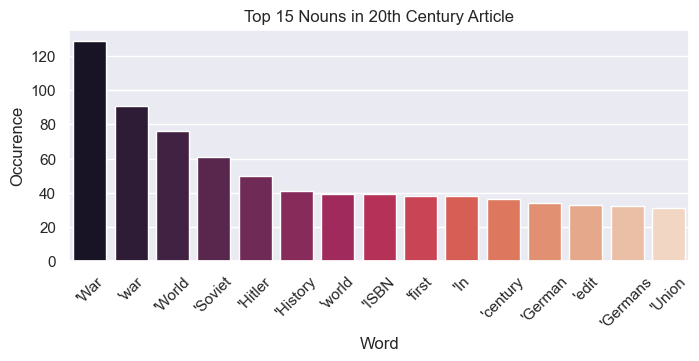

In [361]:
# create a bar chart with the top 15 POS labels (nouns):
# plot the top 15 POS tags in a bar chart (using seaborn)

plt.figure(figsize=(8, 3))
sns.barplot(x = top15_nouns['Word'] , y = top15_nouns['Occurences'], palette = "rocket")
plt.title('Top 15 Nouns in 20th Century Article')
plt.xlabel('Word')
plt.ylabel('Occurence')

#initial Plot wasn't very legible, rotating x-axis
plt.xticks(rotation=45)

In [344]:
# create a bar chart with the top 15 POS labels (verbs):
# first will need to create a dataframe with just Nouns (VB, VBD)
# using our above dataframe df_tagged_text

df_verbs = df_tagged_text[(df_tagged_text['Word type'] == "VB") | (df_tagged_text['Word type'] == "VBD")]

# naming the columns

df_verbs.columns = ["Word", "Occurences"]
x = df_verbs.groupby('Word').count().reset_index()
y = x.sort_values(by = ['Occurences'], ascending=False)

#now to get the top 15
top15_verbs = y.nlargest(15, 'Occurences')

In [346]:
top15_verbs

,Word,Occurences
27,'Retrieved,205
36,'United,30
0,'Allied,19
196,'led,15
316,'used,13
194,'launched,12
1,'Archived,10
93,'controlled,9
161,'forced,8
77,'changed,7


/var/folders/02/_ydtglj578xfqwjs1hm49rhc0000gn/T/ipykernel_89357/544539287.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = top15_verbs['Word'] , y = top15_verbs['Occurences'], palette = "rocket")


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
 [Text(0, 0, "'Retrieved"),
  Text(1, 0, "'United"),
  Text(2, 0, "'Allied"),
  Text(3, 0, "'led"),
  Text(4, 0, "'used"),
  Text(5, 0, "'launched"),
  Text(6, 0, "'Archived"),
  Text(7, 0, "'controlled"),
  Text(8, 0, "'forced"),
  Text(9, 0, "'changed"),
  Text(10, 0, "'surrendered"),
  Text(11, 0, "'turned"),
  Text(12, 0, "'ended"),
  Text(13, 0, "'suffered"),
  Text(14, 0, "'planned")])

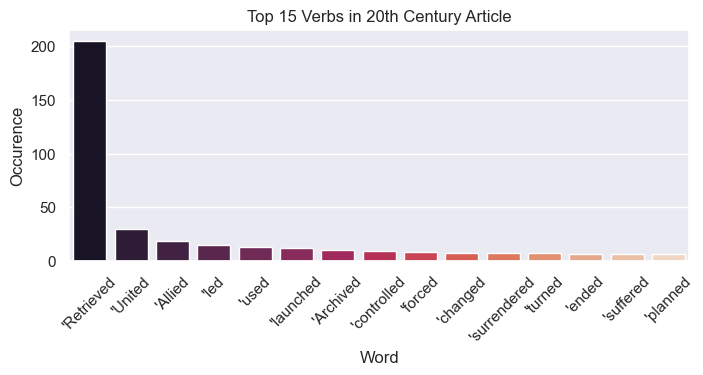

In [363]:
# create a bar chart with the top 15 POS labels (verbs):
# plot the top 15 POS tags in a bar chart (using seaborn)

plt.figure(figsize=(8, 3))
sns.barplot(x = top15_verbs['Word'] , y = top15_verbs['Occurences'], palette = "rocket")
plt.title('Top 15 Verbs in 20th Century Article')
plt.xlabel('Word')
plt.ylabel('Occurence')

#initial Plot wasn't very legible, rotating x-axis
plt.xticks(rotation=45)


In [353]:
# create a bar chart with the top 15 POS labels (adjectives):
# first will need to create a dataframe with just Adjectives (JJ)
# using our above dataframe df_tagged_text

df_adjs = df_tagged_text[(df_tagged_text['Word type'] == "JJ")]

# naming the columns

df_adjs.columns = ["Word", "Occurences"]
x = df_adjs.groupby('Word').count().reset_index()
y = x.sort_values(by = ['Occurences'], ascending=False)

#now to get the top 15
top15_adjs = y.nlargest(15, 'Occurences')


In [355]:
top15_adjs

,Word,Occurences
27,'Japanese,36
2,'American,24
5,'Atlantic,13
20,'Guardian,10
14,'Chinese,7
42,'Russian,6
103,'political,6
1,'African,6
104,'possible,5
7,'Baltic,5


/var/folders/02/_ydtglj578xfqwjs1hm49rhc0000gn/T/ipykernel_89357/1061005954.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = top15_adjs['Word'] , y = top15_adjs['Occurences'], palette = "rocket")


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
 [Text(0, 0, "'Japanese"),
  Text(1, 0, "'American"),
  Text(2, 0, "'Atlantic"),
  Text(3, 0, "'Guardian"),
  Text(4, 0, "'Chinese"),
  Text(5, 0, "'Russian"),
  Text(6, 0, "'political"),
  Text(7, 0, "'African"),
  Text(8, 0, "'possible"),
  Text(9, 0, "'Baltic"),
  Text(10, 0, "'Australian"),
  Text(11, 0, "'Brian"),
  Text(12, 0, "'Italian"),
  Text(13, 0, "'These"),
  Text(14, 0, "'medical")])

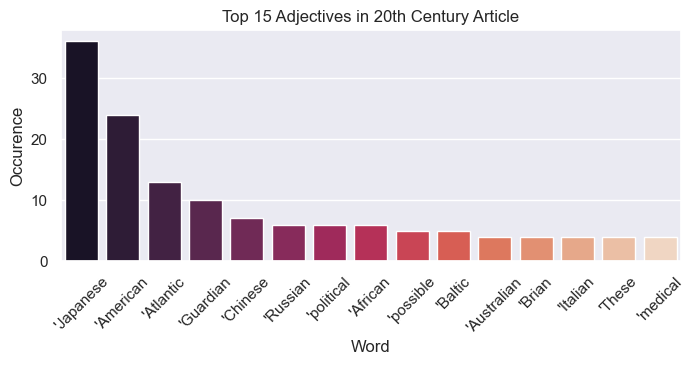

In [359]:
# create a bar chart with the top 15 POS labels (Adjectives):
# plot the top 15 POS tags in a bar chart (using seaborn)

plt.figure(figsize=(8, 3))
sns.barplot(x = top15_adjs['Word'] , y = top15_adjs['Occurences'], palette = "rocket")
plt.title('Top 15 Adjectives in 20th Century Article')
plt.xlabel('Word')
plt.ylabel('Occurence')

# initial plot wasn't very legible
plt.xticks(rotation=45)

My initial observation is that war seemed to be a very common theme (as expected), however I was surprised to see that Japanese was the most commonly used adjective. This almost makes me wonder if there was some bias in the wiki article, or perhaps the section referencing the Holocaust leading to a different, more extensive wiki article. Overall, the verbs seem to be very much in line with the findings from the Nouns & Adjectives (seemingly war-related actions/terms).

## 05. Create dataframe for Countries/Frequency

In [372]:
# create a plot showing how frequently each country is mentioned
# time to use the above "countries csv"

df_countries = countries
df_countries

,country_name
1,Afghanistan
2,Albania
3,Algeria
4,Andorra
5,Angola
...,...
205,Sahrawi Arab Democratic Republic
206,Somaliland
207,South Ossetia
208,Taiwan


In [386]:
# now that we have our dataframe, we need to find the frequency at which each country was mentioned in the article and create a dataframe with that information.
# the first step could be to create a dictionary with counts of occurrence of each word
# then populate a new dictionary with ONLY the countries
# we can then turn the countries/counts dictionary into a dataframe.

# turn the list of words into a string (calling tokenized_words from above)
text_string = ' '.join([str(element) for element in tokenized_words])
text_string

"Key events of the 20th century - WikipediaJump to contentMain menuMain menumove to sidebarhide Navigation Main pageContentsCurrent eventsRandom articleAbout WikipediaContact usDonate Contribute HelpLearn to editCommunity portalRecent changesUpload fileSearchSearchAppearanceCreate accountLog inPersonal tools Create account Log in Pages for logged out editors learn moreContributionsTalkContentsmove to sidebarhide ( Top ) 1Historic events in the 20th centuryToggle Historic events in the 20th century subsection1.1The world at the beginning of the century1.1.1 '' The war to end all wars '' : World War I ( 1914–1918 ) 1.1.2The Russian Revolution and Communism1.2Between the wars1.2.1Economic depression1.2.2The rise of dictatorship1.3Global war : World War II ( 1939–1945 ) 1.3.1The war in Europe1.3.2Blitzkrieg1.3.3Operation Barbarossa1.3.4Turning tides1.3.5Operation Overlord1.3.6Final days1.3.7The war in the Pacific1.3.7.1Background1.3.8Japanese Expansion1.3.9Allied offensive1.3.10Final days1

In [393]:
# create a count for all words:

word_counts = Counter(re.sub(r'\W+', ' ', text_string).split())
# word_counts

In [409]:
# now that we have the count of all words, we can create a dictionary of our counts:
# first try didn't work, time to turn df_countries into a list:

# need to remove whitespace on country names:
# lets do a loop:

countries['country_name'] = countries['country_name'].str.strip()

countries_list = countries['country_name'].to_list()


dict_of_counts = {d : word_counts[d] 
                  for d in countries_list}

dict_of_counts

{'Afghanistan': 1,
 'Albania': 2,
 'Algeria': 1,
 'Andorra': 0,
 'Angola': 1,
 'Antigua and Barbuda': 0,
 'Argentina': 0,
 'Armenia': 0,
 'Australia': 2,
 'Austria': 5,
 'Azerbaijan': 0,
 'Bahamas, The': 0,
 'Bahrain': 0,
 'Bangladesh': 2,
 'Barbados': 0,
 'Belarus': 1,
 'Belgium': 2,
 'Belize': 0,
 'Benin': 0,
 'Bhutan': 0,
 'Bolivia': 0,
 'Bosnia and Herzegovina': 0,
 'Botswana': 0,
 'Brazil': 0,
 'Brunei': 0,
 'Bulgaria': 2,
 'Burkina Faso': 0,
 'Burundi': 0,
 'Cambodia': 2,
 'Cameroon': 0,
 'Canada': 2,
 'Cape Verde': 0,
 'Central African Republic': 0,
 'Chad': 0,
 'Chile': 0,
 "China, People's Republic of": 0,
 'Colombia': 0,
 'Comoros': 0,
 'Congo, Democratic Republic of the': 0,
 'Congo, Republic of the': 0,
 'Costa Rica': 0,
 'Croatia': 0,
 'Cuba': 3,
 'Cyprus': 0,
 'Czech Republic': 0,
 'Denmark': 3,
 'Djibouti': 0,
 'Dominica': 0,
 'Dominican Republic': 0,
 'East Timor': 0,
 'Ecuador': 0,
 'Egypt': 2,
 'El Salvador': 0,
 'Equatorial Guinea': 0,
 'Eritrea': 0,
 'Estonia': 2,
 

In [420]:
# convert the countries dictionary to a dataframe:
# using list comprehension using a key (k) - value (v) pair
# the country is the key, the count will be the value

countries1 = [{'Country Name': k, 'Count': v} for k, v in dict_of_counts.items()]


countries_df = pd.DataFrame(countries1)
countries_df

,Country Name,Count
0,Afghanistan,1
1,Albania,2
2,Algeria,1
3,Andorra,0
4,Angola,1
...,...,...
203,Sahrawi Arab Democratic Republic,0
204,Somaliland,0
205,South Ossetia,0
206,Taiwan,0


In [424]:
# in order to plot the frequency with which each country was mentioned, I think it's best to filter out the countries that have zero mentions

countries_mentioned = countries_df[countries_df['Count'] > 1]

print(countries_mentioned)

    Country Name  Count
1        Albania      2
8      Australia      2
9        Austria      5
13    Bangladesh      2
16       Belgium      2
25      Bulgaria      2
28      Cambodia      2
30        Canada      2
42          Cuba      3
45       Denmark      3
51         Egypt      2
55       Estonia      2
59       Finland      4
60        France     16
64       Germany     43
66        Greece      4
69        Guinea      4
74       Hungary      3
76         India      9
78          Iran      4
81        Israel      4
82         Italy     14
85         Japan     33
95        Latvia      2
99         Libya      5
101    Lithuania      3
124  Netherlands      2
130       Norway      5
132     Pakistan      4
139  Philippines      5
140       Poland     13
143      Romania      3
144       Russia     10
157    Singapore      2
182      Ukraine      2
191      Vietnam     13


/var/folders/02/_ydtglj578xfqwjs1hm49rhc0000gn/T/ipykernel_89357/1588059503.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = countries_mentioned['Country Name'] , y = countries_mentioned['Count'], palette = "rocket")


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35],
 [Text(0, 0, 'Albania'),
  Text(1, 0, 'Australia'),
  Text(2, 0, 'Austria'),
  Text(3, 0, 'Bangladesh'),
  Text(4, 0, 'Belgium'),
  Text(5, 0, 'Bulgaria'),
  Text(6, 0, 'Cambodia'),
  Text(7, 0, 'Canada'),
  Text(8, 0, 'Cuba'),
  Text(9, 0, 'Denmark'),
  Text(10, 0, 'Egypt'),
  Text(11, 0, 'Estonia'),
  Text(12, 0, 'Finland'),
  Text(13, 0, 'France'),
  Text(14, 0, 'Germany'),
  Text(15, 0, 'Greece'),
  Text(16, 0, 'Guinea'),
  Text(17, 0, 'Hungary'),
  Text(18, 0, 'India'),
  Text(19, 0, 'Iran'),
  Text(20, 0, 'Israel'),
  Text(21, 0, 'Italy'),
  Text(22, 0, 'Japan'),
  Text(23, 0, 'Latvia'),
  Text(24, 0, 'Libya'),
  Text(25, 0, 'Lithuania'),
  Text(26, 0, 'Netherlands'),
  Text(27, 0, 'Norway'),
  Text(28, 0, 'Pakistan'),
  Text(29, 0, 'Philippines'),
  Text(30, 0, 'Poland'),
  T

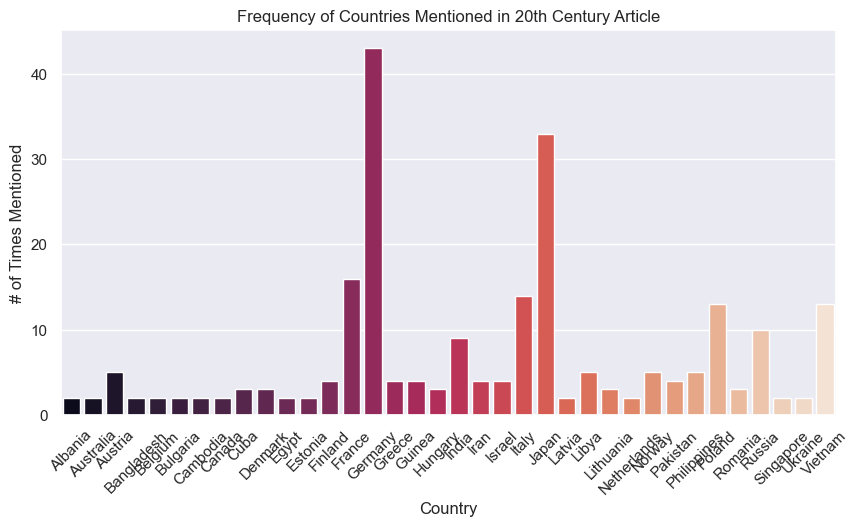

In [426]:
# will be using countries_mentioned to plot the frequency:
# using seaborn:

plt.figure(figsize=(10, 5))
sns.barplot(x = countries_mentioned['Country Name'] , y = countries_mentioned['Count'], palette = "rocket")
plt.title('Frequency of Countries Mentioned in 20th Century Article')
plt.xlabel('Country')
plt.ylabel('# of Times Mentioned')

# initial plot wasn't very legible
plt.xticks(rotation=45)



Unsurprisingly, Countries that were actively involved in WWI & II had a higher frequency of mentions within the article. It also appears that countries involved in other world events (primarily wars, invasions, etc) were more likely to be mentioned. Given this, and the above generated verbs, I think it's unlikely that this article will have a positive sentiment analysis.

## 06. Sentiment Analysis

In [443]:
# run a sentiment analysis on the article to determine tone and subjectivity (use TextBlob)

text_sent = TextBlob(str(tokenized_words))
print(text_sent.sentiment)

Sentiment(polarity=0.056989605862322185, subjectivity=0.37194839715927824)


In [34]:
# sentiment analysis? save, download, push

So the polarity here is close to zero (0.057) indicating that this text has a relatively neutral text (as sentiment ranges from -1 to +1). Subjectivity ranges from 0 (objective, factual) to 1 (subjective, personal opinion, feelings based). As this value is above zero, yet less than 0.5, we can draw the conclusion that this article is primarily factual, but might have some personal opinions/bias. When analyzing events, keeping potential author bias in mind and finding objective texts is important as bias can have a huge impact on data presentation and interpretation.